In [1]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv("./encoded_bin_df.csv")
df.head()

,outcome_type,le_gender,le_color1,le_color2,le_breed1,le_breed2,le_intake_type,le_intake_condition,le_intake_sex,le_outcome_sex,le_outcome_d_m,le_intake_d_m,Outcome_Age_Month,Duration_Day
0,0,1,35,33,326,106,2,5,1,1,5,5,80,1.113889
1,0,1,35,33,326,106,2,5,1,1,3,3,89,1.259722
2,0,1,33,36,124,166,1,5,1,1,6,6,120,4.970139
3,0,1,12,33,309,166,2,3,1,1,2,2,193,0.119444
4,0,0,2,33,217,120,3,0,2,2,2,2,185,0.870833


In [3]:
target = df["outcome_type"]
target_names = ['No', 'Yes']

In [4]:
data = df.drop('outcome_type', axis=1)
variables = data.columns
data.head()

,le_gender,le_color1,le_color2,le_breed1,le_breed2,le_intake_type,le_intake_condition,le_intake_sex,le_outcome_sex,le_outcome_d_m,le_intake_d_m,Outcome_Age_Month,Duration_Day
0,1,35,33,326,106,2,5,1,1,5,5,80,1.113889
1,1,35,33,326,106,2,5,1,1,3,3,89,1.259722
2,1,33,36,124,166,1,5,1,1,6,6,120,4.970139
3,1,12,33,309,166,2,3,1,1,2,2,193,0.119444
4,0,2,33,217,120,3,0,2,2,2,2,185,0.870833


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7698141064358097

In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8328971209985907

In [8]:
sorted(zip(rf.feature_importances_, variables), reverse=True)

[(0.2964497282632657, 'Duration_Day'),
 (0.16948107310315488, 'le_outcome_sex'),
 (0.11583177063731337, 'Outcome_Age_Month'),
 (0.07813930067664873, 'le_breed1'),
 (0.07492587909092514, 'le_intake_type'),
 (0.05042513228020612, 'le_color1'),
 (0.046354369608571054, 'le_intake_d_m'),
 (0.045958377049065434, 'le_outcome_d_m'),
 (0.038769972493406676, 'le_intake_sex'),
 (0.03592397042498865, 'le_color2'),
 (0.030431400151412043, 'le_breed2'),
 (0.010855633828880369, 'le_intake_condition'),
 (0.00645339239216164, 'le_gender')]

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
rf_cv_score = cross_val_score(rf, data, target, cv=10, scoring='roc_auc')

In [11]:
rf_predict = rf.predict(X_test)

In [12]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict))
print('\n')
print("=== All AUC Scores ===")
print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[6306 1681]
 [ 809 6105]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7987
           1       0.78      0.88      0.83      6914

   micro avg       0.83      0.83      0.83     14901
   macro avg       0.84      0.84      0.83     14901
weighted avg       0.84      0.83      0.83     14901



=== All AUC Scores ===
[0.92078562 0.85925535 0.84008737 0.87073035 0.8579941  0.88716471
 0.89293068 0.89795301 0.92130065 0.91587569]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8864077550450933


In [13]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, rf_predict))
print("RMSE: %f" %(rmse))

RMSE: 0.408782


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

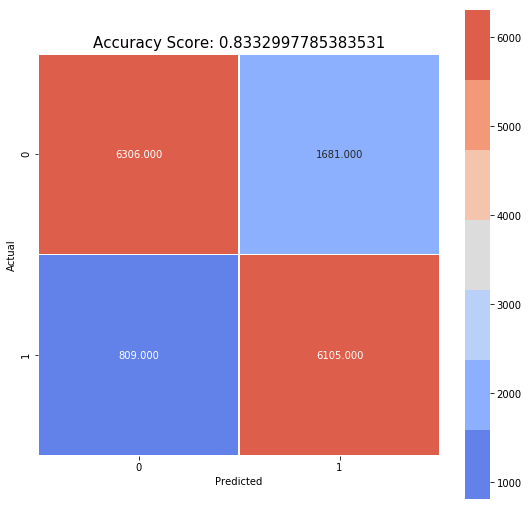

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap((confusion_matrix(y_test, rf_predict)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = (sns.color_palette("coolwarm",7)));
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: 0.8332997785383531'
plt.title(all_sample_title, size = 15);
plt.savefig('cm_rf_bin.png')